<a href="https://colab.research.google.com/github/jespimentel/atos_cgmp/blob/main/eSAJ_CGMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise do arquivo "atos.csv" do eSAJ para fins correicionais

José Eduardo de Souza Pimentel

https://github.com/jespimentel

Instruções:
1. Gere os arquivos "csv" selecionando o foro e o período de interesse.
2. Certifique-se de selecionar "ambas" nos "checkboxes" para cada um deles.

In [1]:
# Importações e configurações
import pandas as pd
import matplotlib.pyplot as plt

import glob

In [2]:
# Estratégia para a leitura de múltiplos arquivos csv.
caminho = '/content/*.csv'

arquivos_csv = glob.glob(caminho)

atos = pd.DataFrame()

for arquivo in arquivos_csv:
    df_temp = pd.read_csv (arquivo, sep = ';', encoding='ISO-8859-1', on_bad_lines='skip',
                           low_memory = False, parse_dates=['Disponibilização', 'Data da intimação'], dayfirst=True)
    atos = pd.concat([atos, df_temp], ignore_index=True)

In [3]:
display(atos.head(5))

,Número do processo,Foro,Vara,Especialização,Cargo,Disponibilização,Prazo processual,Movimentação,Teor da intimação,Classe principal,Assunto principal,Natureza da comunicação,Situação,Tarjas,Data da intimação,Recebido por
0,1501712-87.2022.8.26.0451,Foro de Piracicaba,2ª Vara Criminal,Criminal,014º PROMOTOR DE JUSTIÇA,2024-02-27,1 dias,Concedida a Dilação de Prazo,Devolvam-se os autos à origem para o prossegui...,Inquérito Policial,Crimes Previstos no Estatuto do Idoso,Intimação,Cumprida,Estatuto do Idoso|Atuação do Ministério Público,2024-02-27,Ministério Público do Estado de São Paulo
1,1509942-84.2023.8.26.0451,Foro de Piracicaba,3ª Vara Criminal,Criminal,004º PROMOTOR DE JUSTIÇA,2024-02-27,6 dias,Ato Ordinatório - Intimação - Portal,Ato Ordinatório - Vista ao Ministério Público ...,Inquérito Policial,Estelionato,Intimação,Cumprida,NaN,2024-02-27,Ministério Público do Estado de São Paulo
2,1509699-48.2020.8.26.0451,Foro de Piracicaba,1ª Vara Criminal,Criminal,006º PROMOTOR DE JUSTIÇA,2024-02-27,0 dias,Outras Decisões,Vistos. Fls. 202: trata-se de representação da...,Inquérito Policial,Tráfico de Drogas e Condutas Afins,Intimação,Cumprida,Atuação do Ministério Público,2024-02-27,Ministério Público do Estado de São Paulo
3,1018354-95.2022.8.26.0451,Foro de Piracicaba,Vara do Juri / Execuções,Execuções Criminais,015º PROMOTOR DE JUSTIÇA,2024-02-27,10 dias,Ato Ordinatório - Intimação - Portal - Ciência...,Ato Ordinatório - Ciência ao Ministério Público,Execução de Pena de Multa,Pena de Multa,Intimação,Cumprida,NaN,2024-02-27,Ministério Público do Estado de São Paulo
4,1510436-46.2023.8.26.0451,Foro de Piracicaba,1ª Vara Criminal,Criminal,006º PROMOTOR DE JUSTIÇA,2024-02-27,6 dias,Ato Ordinatório - Intimação - Portal,Ato Ordinatório - Vista ao Ministério Público ...,Inquérito Policial,Ameaça,Intimação,Cumprida,Segredo de Justiça|Atuação do Ministério Públi...,2024-02-27,Ministério Público do Estado de São Paulo


In [4]:
data_min_disponibilizacao = atos['Disponibilização'].min().strftime('%d/%m/%Y')
data_max_disponibilizacao = atos['Disponibilização'].max().strftime('%d/%m/%Y')

data_min_intimacao = atos['Data da intimação'].min().strftime('%d/%m/%Y')
data_max_intimacao = atos['Data da intimação'].max().strftime('%d/%m/%Y')

periodo_total = atos['Data da intimação'].max() - atos['Data da intimação'].min()

print(f'Disponibilizações entre {data_min_disponibilizacao} e {data_max_disponibilizacao}')
print(f'Intimações entre {data_min_intimacao} e {data_max_intimacao}')
print(f'Total de dias: {periodo_total.days}')

Disponibilizações entre 14/11/2023 e 27/02/2024
Intimações entre 30/11/2023 e 28/02/2024
Total de dias: 90


In [5]:
# Operação com datas
atos['Prazo'] = atos['Prazo processual'].str.extract('(\d+)').astype(int)
atos['Dias Decorridos'] = (atos['Data da intimação'] - atos['Disponibilização']).dt.days

In [6]:
# Salva o dataframe em Excel
atos.to_excel("atos.xlsx", sheet_name='Controle', index=False)

# Visão geral

In [7]:
titulo = f'Interações totais por cargo entre {data_min_disponibilizacao} e {data_max_disponibilizacao}\n\n'
visao_geral = atos.groupby('Cargo')['Número do processo'].count()
print(titulo, visao_geral.sort_values(ascending=False))

markdown_table = visao_geral.to_markdown()
with open ('visao_geral.md', 'w') as file:
  file.write(titulo)
  file.write(markdown_table)

Interações totais por cargo entre 14/11/2023 e 27/02/2024

 Cargo
012º PROMOTOR DE JUSTIÇA    2520
005º PROMOTOR DE JUSTIÇA    1836
002º PROMOTOR DE JUSTIÇA    1296
015º PROMOTOR DE JUSTIÇA    1268
011º PROMOTOR DE JUSTIÇA    1180
010º PROMOTOR DE JUSTIÇA    1169
014º PROMOTOR DE JUSTIÇA    1140
008º PROMOTOR DE JUSTIÇA    1085
009º PROMOTOR DE JUSTIÇA    1055
006º PROMOTOR DE JUSTIÇA    1021
013º PROMOTOR DE JUSTIÇA    1009
007º PROMOTOR DE JUSTIÇA     969
004º PROMOTOR DE JUSTIÇA     877
017º PROMOTOR DE JUSTIÇA     861
016º PROMOTOR DE JUSTIÇA     742
050º PROMOTOR DE JUSTIÇA     729
003º PROMOTOR DE JUSTIÇA     621
001º PROMOTOR DE JUSTIÇA     533
150º PROMOTOR DE JUSTIÇA      40
100º PROMOTOR DE JUSTIÇA       7
020º PROMOTOR DE JUSTIÇA       2
101º PROMOTOR DE JUSTIÇA       1
114º PROMOTOR DE JUSTIÇA       1
Name: Número do processo, dtype: int64


In [8]:
titulo = f'Procedimentos únicos por cargo entre {data_min_disponibilizacao} e {data_max_disponibilizacao}\n\n'
procedimentos_unicos = atos.groupby('Cargo')['Número do processo'].nunique()
print(titulo, procedimentos_unicos.sort_values(ascending=False))

markdown_table = procedimentos_unicos.to_markdown()
with open ('procedimentos_unicos.md', 'w') as file:
  file.write(titulo)
  file.write(markdown_table)

Procedimentos únicos por cargo entre 14/11/2023 e 27/02/2024

 Cargo
012º PROMOTOR DE JUSTIÇA    1624
005º PROMOTOR DE JUSTIÇA    1377
002º PROMOTOR DE JUSTIÇA     922
015º PROMOTOR DE JUSTIÇA     911
014º PROMOTOR DE JUSTIÇA     781
008º PROMOTOR DE JUSTIÇA     744
011º PROMOTOR DE JUSTIÇA     694
007º PROMOTOR DE JUSTIÇA     659
017º PROMOTOR DE JUSTIÇA     634
010º PROMOTOR DE JUSTIÇA     632
006º PROMOTOR DE JUSTIÇA     622
013º PROMOTOR DE JUSTIÇA     615
004º PROMOTOR DE JUSTIÇA     569
009º PROMOTOR DE JUSTIÇA     562
050º PROMOTOR DE JUSTIÇA     558
016º PROMOTOR DE JUSTIÇA     455
001º PROMOTOR DE JUSTIÇA     449
003º PROMOTOR DE JUSTIÇA     400
150º PROMOTOR DE JUSTIÇA      16
100º PROMOTOR DE JUSTIÇA       5
020º PROMOTOR DE JUSTIÇA       1
101º PROMOTOR DE JUSTIÇA       1
114º PROMOTOR DE JUSTIÇA       1
Name: Número do processo, dtype: int64


# Análise de prontidão

In [9]:
atos = atos.sort_values(by='Dias Decorridos', ascending=False)
atos = atos [['Número do processo', 'Classe principal', 'Vara', 'Cargo', 'Prazo', 'Recebido por', 'Disponibilização', 'Data da intimação', 'Dias Decorridos']]
atos.drop(columns=['Recebido por']).head(10)

,Número do processo,Classe principal,Vara,Cargo,Prazo,Disponibilização,Data da intimação,Dias Decorridos
17128,0013749-02.2017.8.26.0451,Pedido de Busca e Apreensão Criminal,2ª Vara Criminal,150º PROMOTOR DE JUSTIÇA,0,2023-12-07,2024-01-22,46
15248,1017173-25.2023.8.26.0451,Procedimento Investigatório Criminal (PIC-MP),1ª Vara Criminal,008º PROMOTOR DE JUSTIÇA,10,2023-12-15,2024-01-29,45
15251,1017176-77.2023.8.26.0451,Procedimento Investigatório Criminal (PIC-MP),1ª Vara Criminal,008º PROMOTOR DE JUSTIÇA,10,2023-12-15,2024-01-29,45
16761,1016081-46.2022.8.26.0451,Procedimento Especial da Lei Antitóxicos,4ª Vara Criminal,150º PROMOTOR DE JUSTIÇA,10,2023-12-11,2024-01-24,44
16870,1025202-64.2023.8.26.0451,Procedimento Comum Cível,3ª Vara de Família e Sucessões,008º PROMOTOR DE JUSTIÇA,10,2023-12-11,2024-01-22,42
16772,1008659-64.2015.8.26.0451,Recuperação Judicial,4ª Vara Cível,008º PROMOTOR DE JUSTIÇA,10,2023-12-11,2024-01-22,42
14982,1000632-92.2015.8.26.0451,Execução de Alimentos,3ª Vara de Família e Sucessões,008º PROMOTOR DE JUSTIÇA,10,2023-12-15,2024-01-22,38
14541,1002386-93.2020.8.26.0451,Procedimento Comum Cível,4ª Vara Cível,008º PROMOTOR DE JUSTIÇA,10,2023-12-18,2024-01-25,38
14147,1013168-57.2023.8.26.0451,Procedimento Comum Cível,4ª Vara Cível,008º PROMOTOR DE JUSTIÇA,10,2023-12-19,2024-01-25,37
16911,1002140-66.2021.8.26.0450,Busca e Apreensão em Alienação Fiduciária,4ª Vara Cível,008º PROMOTOR DE JUSTIÇA,10,2023-12-11,2024-01-17,37


In [10]:
print('Top 10 - Máximo de dias decorridos desde a disponibilização')
max_dias_decorridos = atos.groupby(['Cargo'])['Dias Decorridos'].max().sort_values(ascending=False)
display(max_dias_decorridos.head(10))

Top 10 - Máximo de dias decorridos desde a disponibilização


Cargo
150º PROMOTOR DE JUSTIÇA    46
008º PROMOTOR DE JUSTIÇA    45
007º PROMOTOR DE JUSTIÇA    27
001º PROMOTOR DE JUSTIÇA    26
013º PROMOTOR DE JUSTIÇA    25
004º PROMOTOR DE JUSTIÇA    25
100º PROMOTOR DE JUSTIÇA    22
014º PROMOTOR DE JUSTIÇA    21
050º PROMOTOR DE JUSTIÇA    21
016º PROMOTOR DE JUSTIÇA    21
Name: Dias Decorridos, dtype: int64

In [11]:
print('Top 10 - Média de dias decorridos desde a disponibilização')
media_dias_decorridos = atos.groupby(['Cargo'])['Dias Decorridos'].mean().round(2).sort_values(ascending=False)
display(media_dias_decorridos.head(10))

Top 10 - Média de dias decorridos desde a disponibilização


Cargo
150º PROMOTOR DE JUSTIÇA    7.98
100º PROMOTOR DE JUSTIÇA    6.29
008º PROMOTOR DE JUSTIÇA    4.20
001º PROMOTOR DE JUSTIÇA    1.71
004º PROMOTOR DE JUSTIÇA    1.25
007º PROMOTOR DE JUSTIÇA    1.13
012º PROMOTOR DE JUSTIÇA    0.91
014º PROMOTOR DE JUSTIÇA    0.88
010º PROMOTOR DE JUSTIÇA    0.86
017º PROMOTOR DE JUSTIÇA    0.77
Name: Dias Decorridos, dtype: float64

In [12]:
print('Top 10 processos mais disponibilizados no período')
atos.groupby('Número do processo')['Número do processo'].count().sort_values(ascending=False).head(10)

Top 10 processos mais disponibilizados no período


Número do processo
1500263-67.2024.8.26.0599    9
1502293-12.2023.8.26.0599    9
1501740-62.2023.8.26.0599    9
0037511-91.2010.8.26.0451    8
1501621-38.2022.8.26.0599    8
1512088-98.2023.8.26.0451    8
1018758-49.2022.8.26.0451    8
1502303-56.2023.8.26.0599    8
1501541-40.2023.8.26.0599    7
1502077-78.2021.8.26.0451    7
Name: Número do processo, dtype: int64

In [13]:
titulo = f'Retornos do mesmo processo por cargo entre {data_min_disponibilizacao} e {data_max_disponibilizacao}\n\n'
retornos_por_cargo = atos.groupby('Cargo')['Número do processo'].value_counts()
print(titulo, retornos_por_cargo)

markdown_table = retornos_por_cargo.to_markdown()

with open('retorno_por_cargo.md', 'w') as file:
    file.write(titulo)
    file.write(markdown_table)

Retornos do mesmo processo por cargo entre 14/11/2023 e 27/02/2024

 Cargo                     Número do processo       
001º PROMOTOR DE JUSTIÇA  1024543-55.2023.8.26.0451    7
                          1020245-93.2018.8.26.0451    5
                          1509009-14.2023.8.26.0451    5
                          1001786-04.2022.8.26.0451    4
                          1502360-04.2021.8.26.0451    4
                                                      ..
150º PROMOTOR DE JUSTIÇA  1021340-85.2023.8.26.0451    2
                          1502419-62.2023.8.26.0599    2
                          0004171-54.2013.8.26.0451    1
                          1008534-18.2023.8.26.0451    1
                          1019699-04.2019.8.26.0451    1
Name: Número do processo, Length: 13232, dtype: int64


# Recebidos pelo sistema

In [14]:
# Filtragem dos dados
criterio_1 = atos['Recebido por'].isnull()

atos_filtrados = atos[criterio_1]
print(f'Processos recebidos pelo sistema: {len(atos_filtrados)}')
atos_filtrados.head(10)

Processos recebidos pelo sistema: 176


,Número do processo,Classe principal,Vara,Cargo,Prazo,Recebido por,Disponibilização,Data da intimação,Dias Decorridos
17128,0013749-02.2017.8.26.0451,Pedido de Busca e Apreensão Criminal,2ª Vara Criminal,150º PROMOTOR DE JUSTIÇA,0,NaN,2023-12-07,2024-01-22,46
15248,1017173-25.2023.8.26.0451,Procedimento Investigatório Criminal (PIC-MP),1ª Vara Criminal,008º PROMOTOR DE JUSTIÇA,10,NaN,2023-12-15,2024-01-29,45
15251,1017176-77.2023.8.26.0451,Procedimento Investigatório Criminal (PIC-MP),1ª Vara Criminal,008º PROMOTOR DE JUSTIÇA,10,NaN,2023-12-15,2024-01-29,45
16761,1016081-46.2022.8.26.0451,Procedimento Especial da Lei Antitóxicos,4ª Vara Criminal,150º PROMOTOR DE JUSTIÇA,10,NaN,2023-12-11,2024-01-24,44
19966,0010729-61.2021.8.26.0451,Seqüestro,2ª Vara Criminal,150º PROMOTOR DE JUSTIÇA,0,NaN,2023-11-14,2023-12-13,29
13356,0004171-54.2013.8.26.0451,Ação Penal - Procedimento Ordinário,1ª Vara Criminal,150º PROMOTOR DE JUSTIÇA,10,NaN,2024-01-09,2024-02-05,27
12921,1501632-60.2021.8.26.0451,Inquérito Policial,1ª Vara Criminal,001º PROMOTOR DE JUSTIÇA,10,NaN,2024-01-10,2024-02-05,26
12700,1006849-10.2022.8.26.0451,Procedimento Comum Cível,4ª Vara Cível,008º PROMOTOR DE JUSTIÇA,10,NaN,2024-01-11,2024-02-05,25
11805,0003853-90.2021.8.26.0451,Cumprimento de sentença,3ª Vara de Família e Sucessões,008º PROMOTOR DE JUSTIÇA,10,NaN,2024-01-15,2024-02-05,21
10856,1022631-62.2019.8.26.0451,Dissolução Parcial de Sociedade,4ª Vara Cível,008º PROMOTOR DE JUSTIÇA,10,NaN,2024-01-18,2024-02-05,18


In [15]:
print('Top 10 processos recebidos pelo sistema mais disponibilizados no período')
atos_filtrados.groupby('Número do processo')['Número do processo'].count().sort_values(ascending=False).head(10)

Top 10 processos recebidos pelo sistema mais disponibilizados no período


Número do processo
0013749-02.2017.8.26.0451    3
1009812-30.2018.8.26.0451    2
1005645-62.2021.8.26.0451    2
1023638-50.2023.8.26.0451    2
1502677-31.2023.8.26.0451    2
1012114-90.2022.8.26.0451    2
1022542-97.2023.8.26.0451    2
0005247-79.2014.8.26.0451    2
1500417-78.2023.8.26.0451    1
1024125-20.2023.8.26.0451    1
Name: Número do processo, dtype: int64

# Filtragem pelo cargo

In [16]:
# Filtragem dos dados
cargo = '011º PROMOTOR DE JUSTIÇA'
criterio_2 = atos['Cargo'] == cargo

atos_filtrados_1 = atos[criterio_2]
atos_filtrados_1.drop(columns=['Recebido por']).head(10)

,Número do processo,Classe principal,Vara,Cargo,Prazo,Disponibilização,Data da intimação,Dias Decorridos
13954,1506816-26.2023.8.26.0451,Inquérito Policial,4ª Vara Criminal,011º PROMOTOR DE JUSTIÇA,10,2024-01-08,2024-01-16,8
4680,1500134-33.2022.8.26.0599,Ação Penal - Procedimento Ordinário,1ª Vara Criminal,011º PROMOTOR DE JUSTIÇA,10,2024-02-08,2024-02-14,6
4179,0001580-07.2022.8.26.0451,Ação Penal - Procedimento Ordinário,1ª Vara Criminal,011º PROMOTOR DE JUSTIÇA,10,2024-02-09,2024-02-14,5
12501,0012515-87.2014.8.26.0451,Ação Penal - Procedimento Ordinário,1ª Vara Criminal,011º PROMOTOR DE JUSTIÇA,10,2024-01-11,2024-01-16,5
17233,1500479-96.2022.8.26.0599,Ação Penal - Procedimento Ordinário,1ª Vara Criminal,011º PROMOTOR DE JUSTIÇA,10,2023-12-07,2023-12-11,4
17183,1501530-38.2021.8.26.0451,Inquérito Policial,1ª Vara Criminal,011º PROMOTOR DE JUSTIÇA,10,2023-12-07,2023-12-11,4
8795,1501242-97.2022.8.26.0599,Auto de Prisão em Flagrante,1ª Vara Criminal,011º PROMOTOR DE JUSTIÇA,10,2024-01-25,2024-01-29,4
8200,1500284-36.2023.8.26.0451,Inquérito Policial,1ª Vara Criminal,011º PROMOTOR DE JUSTIÇA,10,2024-01-26,2024-01-30,4
19564,1502359-82.2022.8.26.0451,Inquérito Policial,1ª Vara Criminal,011º PROMOTOR DE JUSTIÇA,10,2023-11-30,2023-12-04,4
14967,0007346-56.2013.8.26.0451,Ação Penal - Procedimento Ordinário,1ª Vara Criminal,011º PROMOTOR DE JUSTIÇA,10,2023-12-15,2023-12-18,3


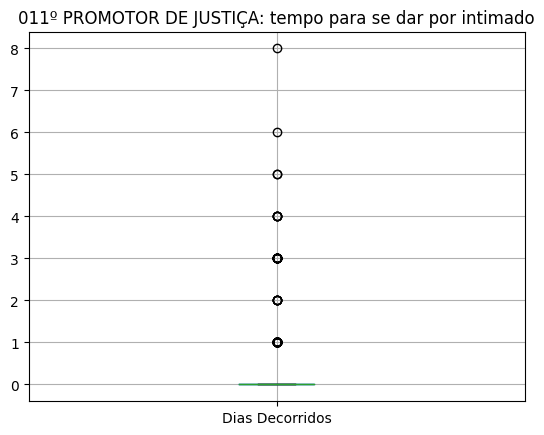

In [17]:
atos_filtrados_1.boxplot(column='Dias Decorridos')
plt.title(f'{cargo}: tempo para se dar por intimado')
plt.savefig('grafico.png')
plt.show()

In [18]:
caminho_arquivo_excel = 'resumo.xlsx'

with pd.ExcelWriter(caminho_arquivo_excel) as writer:
    atos.to_excel(writer, sheet_name='Geral', index=False)
    atos_filtrados.to_excel(writer, sheet_name='Receb. pelo sistema', index=False)
    atos_filtrados_1.to_excel(writer, sheet_name='Pelo cargo', index=False)